In [3]:
from importlib import reload
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
%load_ext autoreload

In [4]:
import pandas as pd
import os
import sys
import numpy as np
import pickle

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

2023-12-06 16:06:00,093 - numexpr.utils - INFO - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2023-12-06 16:06:00,094 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


# Load Data

In [5]:
# Global data
# path to MaxQuant results (evidence.txt) of the same RAW file, used for constructing reference dictionary
maxquant_file_dict = (
    "/mnt/cmnfs/proj/ORIGINS/data/ecoli/HpHRP/MQ/1FDR/"
    "combined/txt/evidence_1_FilteredByClosestRT_transfer_RT_pred_filtered_withIso.pkl"
)
maxquant_file_exp = (
    "/mnt/cmnfs/proj/ORIGINS/data/ecoli/ss/DDA/MQ/combined/txt/evidence_1.txt"
)

MS1Scans_NoArray_path = (
    "/mnt/cmnfs/proj/ORIGINS/data/ecoli/ss/DDA/raw/msconvert/"
    "BBM_647_P241_02_07_ssDDA_MIA_001_MS1Scans_NoArray.csv"
)
# experiment specific
# result_dir ="/mnt/cmnfs/proj/ORIGINS/data/ecoli/ss/DDA/raw/msconvert/BBM_647_P241_02_07_ssDDA_MIA_001_ScanByScan_RTtol1.0_MZtol0.0_condpeakRange_alpha0.0_threshold_abthres0.001_missabthres0.5_convergence_NoIntercept_mix/"
result_dir = "/mnt/cmnfs/proj/ORIGINS/data/ecoli/ss/DDA/raw/msconvert/1FDR_BBM_647_P241_02_07_ssDDA_MIA_001_ScanByScan_RTtol1.0_MZtolNone_peakRange_threshold_abthres0.001_missabthres0.5_convergence_NoIntercept_pred"
basename = os.path.basename(result_dir)
output_file = os.path.join(result_dir, basename + "_output")  # filename

In [6]:
# Load maxquant result (reference)
scan_record = pd.read_pickle(output_file + "_scan_record.pkl")

sum_raw = pd.read_csv(os.path.join(result_dir, "sum_raw.csv"))
sum_minima = pd.read_csv(os.path.join(result_dir, "sum_minima.csv"))
sum_gaussian = pd.read_csv(os.path.join(result_dir, "sum_gaussian.csv"))
sum_peak = pd.read_csv(os.path.join(result_dir, "sum_peak.csv"))

MS1Scans_NoArray = pd.read_csv(MS1Scans_NoArray_path)

In [7]:
# Make result directory if not exist
report_dir = os.path.join(result_dir, "report")
if not os.path.exists(report_dir):
    os.makedirs(report_dir)
    os.makedirs(os.path.join(report_dir, "activation"))

# Load SBS Result class

In [8]:
%autoreload 2
from result_analysis.result_analysis import SBSResult
Maxquant_result_dict = pd.read_pickle(filepath_or_buffer=maxquant_file_dict)
Maxquant_result_exp = pd.read_csv(filepath_or_buffer=maxquant_file_exp, sep="\t")
sum_peak_spec = pd.read_csv(os.path.join(result_dir, "sum_peak.csv"))

SBS_100FDR_PSM = SBSResult(ref_df=Maxquant_result_dict,
                           exp_df=Maxquant_result_exp,
                           sum_raw = sum_raw,
                           sum_peak=sum_peak_spec,
                           sum_gaussian=sum_gaussian,
                           sum_minima=sum_minima,
                           RT_tol=1.0)

2023-12-06 16:06:01,339 - matplotlib - DEBUG - matplotlib data path: /home/zixuanxiao/miniconda3/envs/py310/lib/python3.10/site-packages/matplotlib/mpl-data
2023-12-06 16:06:01,347 - matplotlib - DEBUG - CONFIGDIR=/home/zixuanxiao/.config/matplotlib
2023-12-06 16:06:01,349 - matplotlib - DEBUG - interactive is False
2023-12-06 16:06:01,350 - matplotlib - DEBUG - platform is linux


2023-12-06 16:06:01,492 - matplotlib - DEBUG - CACHEDIR=/home/zixuanxiao/.cache/matplotlib
2023-12-06 16:06:01,496 - matplotlib.font_manager - DEBUG - Using fontManager instance from /home/zixuanxiao/.cache/matplotlib/fontlist-v330.json
2023-12-06 16:06:04,000 - result_analysis.result_analysis - DEBUG - Maxquant experiment file has 19186 entries.
2023-12-06 16:06:04,001 - result_analysis.result_analysis - DEBUG - columns after merge MQ dict and MQ exp Index(['Modified sequence', 'Charge', 'predicted_RT', 'id',
       'Calibrated retention time start', 'Calibrated retention time finish',
       'Calibrated retention time', 'Retention time', 'Intensity', '_merge'],
      dtype='object')
2023-12-06 16:06:04,004 - result_analysis.result_analysis - DEBUG - Keeping 17758 entries with RT difference within 1.0
2023-12-06 16:06:04,005 - result_analysis.result_analysis - DEBUG - columns after filter by RT Index(['Modified sequence', 'Charge', 'predicted_RT', 'id',
       'Calibrated retention ti

In [9]:
SBS_100FDR_PSM.plot_intensity_corr(
    ref_col="Intensity",
    inf_col="AUCActivationPeak",
    interactive=True,
    hover_data=["id", "Modified sequence", "Charge"],
)

Data:  Intensity_log AUCActivationPeak_log , slope =  0.634 , intercept =  1.073 , PearsonR =  0.603 , SpearmanR =  0.622


2023-12-06 16:06:07,296 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-12-06 16:06:07,299 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-12-06 16:06:07,303 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-12-06 16:06:07,304 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/home/zixuanxiao/miniconda3/envs/py310/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
2023-12-06 16:06:07,305 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/home/zixuanxiao/miniconda3/envs/py310/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', 

2023-12-06 16:06:07,334 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Purisa.ttf', name='Purisa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-12-06 16:06:07,334 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/teluguvijayam/suranna.ttf', name='Suranna', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-12-06 16:06:07,335 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-deva-extra/chandas1-2.ttf', name='Chandas', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-12-06 16:06:07,335 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusSans-Regular.otf', name='Nimbus Sans', style='normal', variant='normal', weight=400, stretch='normal', size='s

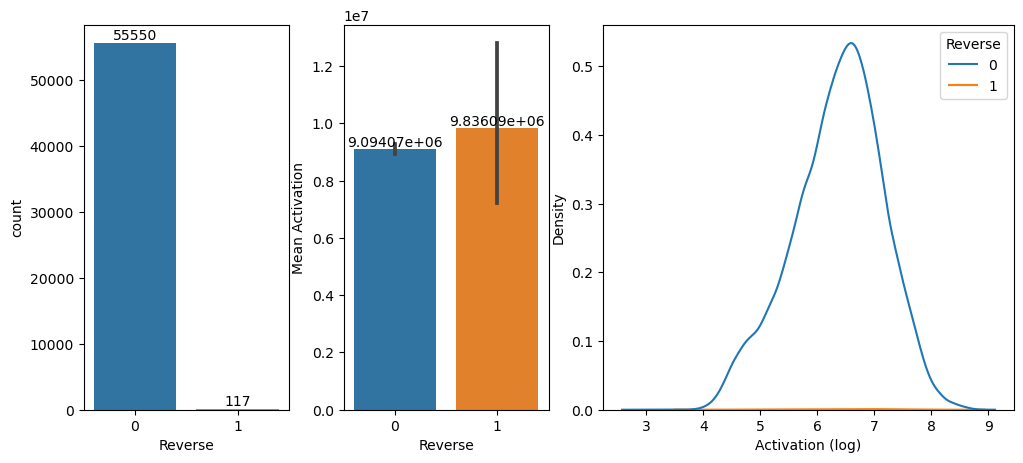

id  AUCActivationRaw
Reverse                         
0        55550      9.094073e+06
1          117      9.836090e+06

In [10]:
SBS_100FDR_PSM.eval_target_decoy()

# Overlap with Maxquant

## Report

In [ ]:
from result_analysis import result_analysis
import result_analysis.result_analysis

reload(result_analysis.result_analysis)
scan_record = result_analysis.GenerateResultReport(
    scan_record=scan_record,
    intensity_cols=[SBS_100FDR_PSM.ref_df[col]
                    for col in SBS_100FDR_PSM.SumActCol]
    + [SBS_100FDR_PSM.ref_exp_df_inner["Intensity"]],
    save_dir=report_dir,
)
scan_record.to_csv(output_file + "_scan_record.csv")

## Plot Activation

In [ ]:
# import result_analysis.result_analysis
# reload(result_analysis.result_analysis)
# from result_analysis import result_analysis
# # Plot activation for selected samples
# Accurate50_idx = Maxquant_result_filtered.nsmallest(50, 'AbsResidue')['id'].values
# Inaccurate50_idx = Maxquant_result_filtered.nlargest(50, 'AbsResidue')['id'].values
# activation_df = pd.DataFrame(activation, index=Maxquant_result_dict['id'])
# for idx in Accurate50_idx:
#     print(idx)
#     _ = result_analysis.PlotActivation(MaxquantEntry=Maxquant_result_filtered.loc[Maxquant_result_filtered['id'] == idx, :],
#                                 PrecursorTimeProfiles=[activation_df.loc[idx, :],
#                                                     #refit_activation_minima[idx, :],
#                                                     #refit_activation_gaussian[idx, :]
#                                                     ],
#                                 PrecursorTimeProfileLabels=['Raw',
#                                                             'LocalMinimaSmoothing',
#                                                             'GaussianSmoothing'],
#                                 MS1ScansNoArray=MS1Scans_NoArray,
#                                 RT_tol=1.0,
#                                 save_dir=os.path.join(report_dir, 'activation', 'accurate'))
# for idx in Inaccurate50_idx:
#     _ = result_analysis.PlotActivation(MaxquantEntry=Maxquant_result_filtered.loc[Maxquant_result_filtered['id'] == idx, :],
#                                 PrecursorTimeProfiles=[activation_df.loc[idx, :],
#                                                     #refit_activation_minima[idx, :],
#                                                     #refit_activation_gaussian[idx, :]
#                                                     ],
#                                 PrecursorTimeProfileLabels=['Raw',
#                                                             'LocalMinimaSmoothing',
#                                                             'GaussianSmoothing'],
#                                 MS1ScansNoArray=MS1Scans_NoArray,
#                                 RT_tol=1.0,
#                                 save_dir=os.path.join(report_dir, 'activation', 'inaccurate'))

# SBS and MQ Elution(RT) comparison

In [ ]:
import result_analysis.result_analysis

reload(result_analysis.result_analysis)
ElutionScan = FindStartAndEndScan(activation=activation)
MS1Scans_NoArray["Scan Index"] = MS1Scans_NoArray.index
MQElutionScan = Maxquant_result[
    [
        "id",
        "Modified sequence",
        "Charge",
        "Retention length",
        "Calibrated retention time start",
        "Calibrated retention time finish",
        "Number of data points",
        "Number of scans",
        "Number of isotopic peaks",
        "Intensity",
        "AUCActivation_Gaussian",
    ]
]
MQElutionScan.sort_values(by="Calibrated retention time start", inplace=True)
MQElutionScan = pd.merge_asof(
    left=MQElutionScan,
    right=MS1Scans_NoArray[["starttime", "Scan Index"]],
    left_on="Calibrated retention time start",
    right_on="starttime",
    direction="nearest",
)
MQElutionScan.sort_values(by="Calibrated retention time finish", inplace=True)
MQElutionScan = pd.merge_asof(
    left=MQElutionScan,
    right=MS1Scans_NoArray[["starttime", "Scan Index"]],
    left_on="Calibrated retention time finish",
    right_on="starttime",
    direction="nearest",
    suffixes=["_start_MQ", "_end_MQ"],
)
MQElutionScan["CountScan_MQ"] = (
    MQElutionScan["Scan Index_end_MQ"] -
    MQElutionScan["Scan Index_start_MQ"] + 1
)
ElutionScan = pd.merge(left=ElutionScan, right=MQElutionScan)
ElutionScan["MQ_SBS_diff"] = ElutionScan["CountScan_MQ"] - \
    ElutionScan["CountScan_SBS"]
ElutionScan["MQ_SBS_start_diff"] = (
    ElutionScan["Scan Index_start_MQ"] - ElutionScan["Scan Index_start_SBS"]
)
ElutionScan["MQ_SBS_end_diff"] = (
    ElutionScan["Scan Index_end_MQ"] - ElutionScan["Scan Index_end_SBS"]
)

In [ ]:
ElutionScan_filtered = ElutionScan[(
    abs(ElutionScan["MQ_SBS_start_diff"]) <= 10)]
PlotCorr(
    ElutionScan_filtered["Intensity"],
    ElutionScan_filtered["AUCActivation_Gaussian"],
    interactive=False,
    data=ElutionScan_filtered,
)

In [ ]:
ElutionScan["MQ_SBS_start_diff"].describe()
ElutionScan["MQ_SBS_end_diff"].describe()

In [ ]:
import matplotlib.pyplot as plt

ElutionScan = ElutionScan.dropna(subset=["Intensity"])
ElutionScan["MQ_SBS_diff"].describe()
ElutionScan["MQ_SBS_diff"].hist(bins=31)
plt.xlabel("Elution Scan Count MQ - Elution Scan Count SBS")
plt.ylabel("count")

# Alphas

In [ ]:
from result_analysis.result_analysis import plot_alphas_across_scan
import result_analysis.result_analysis

reload(result_analysis.result_analysis)
plot_alphas_across_scan(scan_record=scan_record, x="Time")

# Precursor specific trouble shooting

In [11]:
# Load activation matrix
activation = np.load(output_file + "_activationByScanFromLasso.npy")
refit_activation_minima = np.load(output_file + "_activationMinima.npy")
refit_activation_gaussian = np.load(output_file + "_activationGaussian.npy")

## Plot Activation

In [12]:
# Load MS1 scans from pkl or mzml file
# path to the data input in mzML format, containing only MS1 level data
msconvert_file = "/mnt/cmnfs/proj/ORIGINS/data/ecoli/ss/DDA/raw/msconvert/BBM_647_P241_02_07_ssDDA_MIA_001.mzML"
with open(msconvert_file[:-5] + ".pkl", "rb") as f:
    MS1Scans = pickle.load(f)

2023-12-06 16:06:59,809 - result_analysis.result_analysis - DEBUG - RTrange: [10.664543685366509, 12.664543685366509]
2023-12-06 16:06:59,811 - result_analysis.result_analysis - DEBUG - ScanIdx: Int64Index([ 899,  900,  901,  902,  903,  904,  905,  906,  907,  908,
            ...
            1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014],
           dtype='int64', length=116)


2023-12-06 16:06:59,885 - result_analysis.result_analysis - INFO - dict RT can be either from reference file or from experiment file, depending on the MaxquantEntry specified.
2023-12-06 16:06:59,897 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2023-12-06 16:06:59,897 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/home/zixuanxiao/miniconda3/envs/py310/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
2023-12-06 16:06:59,898 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/home/zixuanxiao/miniconda3/envs/py310/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-

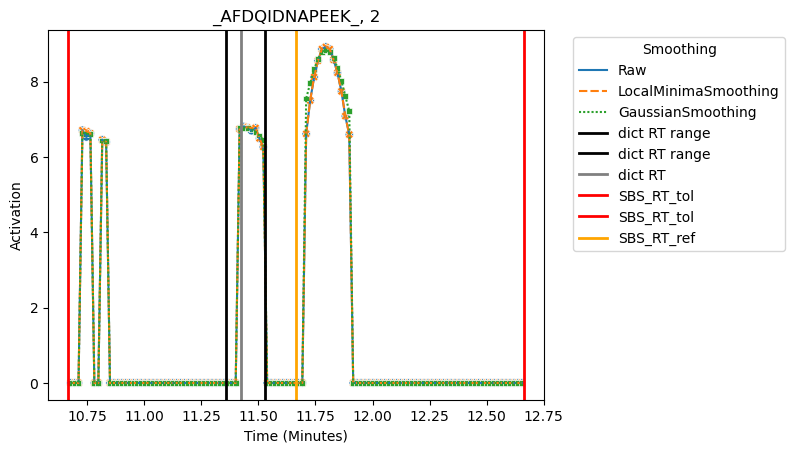

In [13]:
%autoreload 2
import result_analysis
precursor_id = 5095
activation_df = pd.DataFrame(activation, index=Maxquant_result_dict['id'])
minima_activation_df = pd.DataFrame(refit_activation_minima, index=Maxquant_result_dict['id'])
gaussian_activation_df = pd.DataFrame(refit_activation_gaussian, index=Maxquant_result_dict['id'])
act_in_range = result_analysis.result_analysis.PlotActivation(
    MaxquantEntry=SBS_100FDR_PSM.ref_exp_df_inner.loc[SBS_100FDR_PSM.ref_exp_df_inner['id'] == precursor_id, :], 
    PrecursorTimeProfiles=[activation_df.loc[precursor_id, :],
                           minima_activation_df.loc[precursor_id, :], 
                           gaussian_activation_df.loc[precursor_id, :]
                           ],
    PrecursorTimeProfileLabels=['Raw', 
                                'LocalMinimaSmoothing', 
                                'GaussianSmoothing'],
    MS1ScansNoArray=MS1Scans_NoArray, 
    RT_tol=1, 
    log_intensity=True,
    x_ticks='time',
    save_dir=None)

In [ ]:
%autoreload 2
from result_analysis.result_analysis import PlotIsoPatternsAndScan
PlotIsoPatternsAndScan(MS1Scans=MS1Scans, 
                              Maxquant_result=Maxquant_result_dict, 
                              scan_idx = 639, 
                              precursor_id=[44321], 
                              log_intensity=False)

In [ ]:
alignment[303]["abundance"].sum()
IsotopeNotObs[303]["abundance"].sum()

In [ ]:
Maxquant_result.loc[11557, "IsoAbundance"].sum()

In [ ]:
idx = np.where(filteredPrecursorIdx == 18082)
activationByScan[idx]

In [ ]:
import IsoSpecPy as iso

pair = [18083, 18082]
Maxquant_result.loc[
    pair, ["Modified sequence", "Charge", "Retention time", "Intensity", "m/z"]
]
iso.ParseFASTA(Maxquant_result.loc[pair[0], "Modified sequence"])
iso.ParseFASTA(Maxquant_result.loc[pair[1], "Modified sequence"])

In [ ]:
import IsoSpecPy as iso

Maxquant_result.loc[
    [738, 10695], ["Modified sequence", "Charge",
                   "Retention time", "Intensity", "m/z"]
]
iso.ParseFASTA(Maxquant_result.loc[738, "Modified sequence"])
iso.ParseFASTA(Maxquant_result.loc[10695, "Modified sequence"])

In [ ]:
pair = [15879, 12747]
Maxquant_result.loc[
    pair, ["Modified sequence", "Charge", "Retention time", "Intensity", "m/z"]
]
iso.ParseFASTA(Maxquant_result.loc[pair[0], "Modified sequence"])
iso.ParseFASTA(Maxquant_result.loc[pair[1], "Modified sequence"])

In [ ]:
pair = [3772, 3774]
Maxquant_result.loc[
    pair, ["Modified sequence", "Charge", "Retention time", "Intensity", "m/z"]
]
iso.ParseFASTA(Maxquant_result.loc[pair[0], "Modified sequence"])
iso.ParseFASTA(Maxquant_result.loc[pair[1], "Modified sequence"])

In [ ]:
pair = [15120, 14965]
Maxquant_result.loc[
    pair, ["Modified sequence", "Charge", "Retention time", "Intensity", "m/z"]
]
iso.ParseFASTA(Maxquant_result.loc[pair[0], "Modified sequence"])
iso.ParseFASTA(Maxquant_result.loc[pair[1], "Modified sequence"])